<a href="https://colab.research.google.com/github/yshu21297/Dissertation_com_726/blob/main/Chronic_Disease_Management_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary library packages

In [40]:
#!pip install spacy

In [41]:
import nltk
import spacy
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import sparse
import plotly.express as px
from tabulate import tabulate
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from nltk.tokenize import word_tokenize
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

#Loading the dataset

In [42]:
Healthcare_data = pd.read_csv('/content/Healthcare.csv')
Healthcare_data.head()

,patient_id,patient_name,age,gender,address,contact,disease_id,disease_name,disease_description,diagnosis_id,...,doctor_name,specialization,years_of_experience,appointment_id,appointment_date,notes,test_id,test_type,test_result,test_date
0,1,Alex Doe,45,Male,123 Main St,555-1234,101,Diabetes,A chronic condition that affects the way the b...,201,...,Dr. Benjamin Turner,Internal Medicine,15,401,2019-01-10,Routine check-up,501,Blood Sugar,Normal,2019-03-10
1,2,Jane Smith,38,Female,456 Elm St,555-5678,102,Hypertension,A condition in which the force of the blood ag...,202,...,Dr. Sophia Johnson,Cardiology,12,402,2019-01-15,Follow-up for hypertension,502,Blood Pressure,High,2019-03-15
2,3,Robert Johnson,50,Male,789 Oak St,555-8765,103,Asthma,A condition in which your airways narrow and s...,203,...,Dr. Lucas Brown,Pulmonology,18,403,2019-02-05,Diabetes management,503,HbA1c,High,2019-04-05
3,4,Emily Davis,30,Female,101 Maple St,555-4321,104,Heart Disease,Various conditions that affect the heart.,204,...,Dr. Ava Lee,Neurology,10,404,2019-02-20,Asthma control check-up,504,Lung Function,Abnormal,2019-04-20
4,5,Michael Brown,60,Male,202 Birch St,555-1111,105,Arthritis,Inflammation of one or more joints.,205,...,Dr. James Wilson,Ophthalmology,20,405,2019-03-10,Heart disease follow-up,505,EKG,Normal,2019-05-10


#EDA

#Display the data information

In [43]:
Healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           100 non-null    int64 
 1   patient_name         100 non-null    object
 2   age                  100 non-null    int64 
 3   gender               100 non-null    object
 4   address              100 non-null    object
 5   contact              100 non-null    object
 6   disease_id           100 non-null    int64 
 7   disease_name         100 non-null    object
 8   disease_description  100 non-null    object
 9   diagnosis_id         100 non-null    int64 
 10  diagnosis_date       100 non-null    object
 11  doctor_id            100 non-null    int64 
 12  doctor_name          100 non-null    object
 13  specialization       100 non-null    object
 14  years_of_experience  100 non-null    int64 
 15  appointment_id       100 non-null    int64 
 16  appointme

#Checking for missing values

In [44]:
missing_values = Healthcare_data.isnull().sum()
print(missing_values)

patient_id             0
patient_name           0
age                    0
gender                 0
address                0
contact                0
disease_id             0
disease_name           0
disease_description    0
diagnosis_id           0
diagnosis_date         0
doctor_id              0
doctor_name            0
specialization         0
years_of_experience    0
appointment_id         0
appointment_date       0
notes                  0
test_id                0
test_type              0
test_result            0
test_date              0
dtype: int64


#Summary Statistic

In [45]:
Healthcare_data.describe()

,patient_id,age,disease_id,diagnosis_id,doctor_id,years_of_experience,appointment_id,test_id
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,41.830000,150.500000,250.500000,350.500000,16.580000,450.500000,550.500000
std,29.011492,8.840969,29.011492,29.011492,29.011492,2.988801,29.011492,29.011492
min,1.000000,27.000000,101.000000,201.000000,301.000000,10.000000,401.000000,501.000000
25%,25.750000,35.000000,125.750000,225.750000,325.750000,14.750000,425.750000,525.750000
50%,50.500000,41.000000,150.500000,250.500000,350.500000,16.000000,450.500000,550.500000
75%,75.250000,48.250000,175.250000,275.250000,375.250000,19.000000,475.250000,575.250000
max,100.000000,62.000000,200.000000,300.000000,400.000000,22.000000,500.000000,600.000000


#Visualization

# Histogram for age distribution

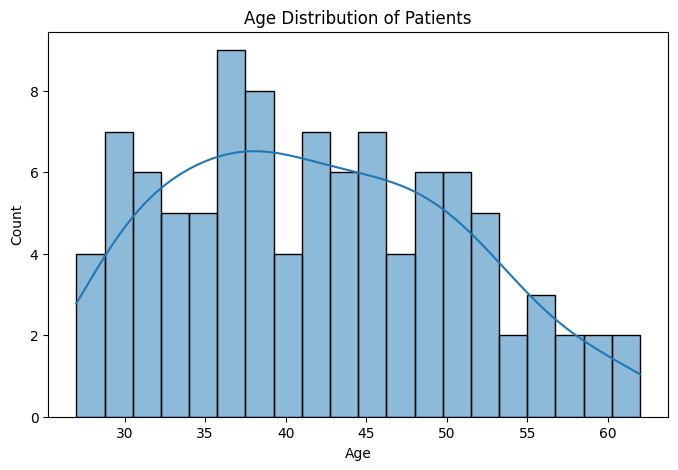

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(Healthcare_data['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#Top 5 Diseases by Distribution

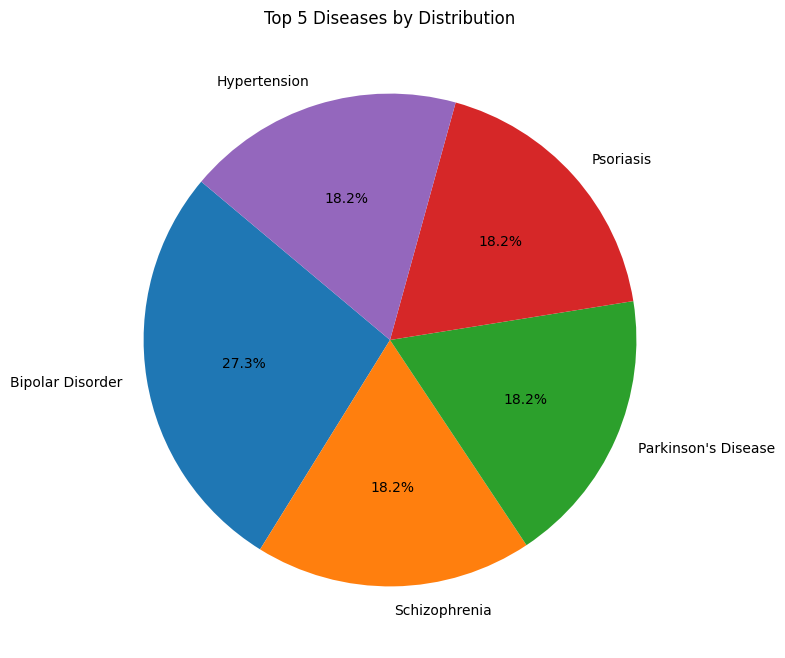

In [47]:
plt.figure(figsize=(8, 8))
top_5_health_issues = Healthcare_data['disease_name'].value_counts().nlargest(5)
plt.pie(top_5_health_issues, labels=top_5_health_issues.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Diseases by Distribution')
plt.show()


#Top 10 Specializations of Doctors

<ipython-input-48-6106a6763555>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




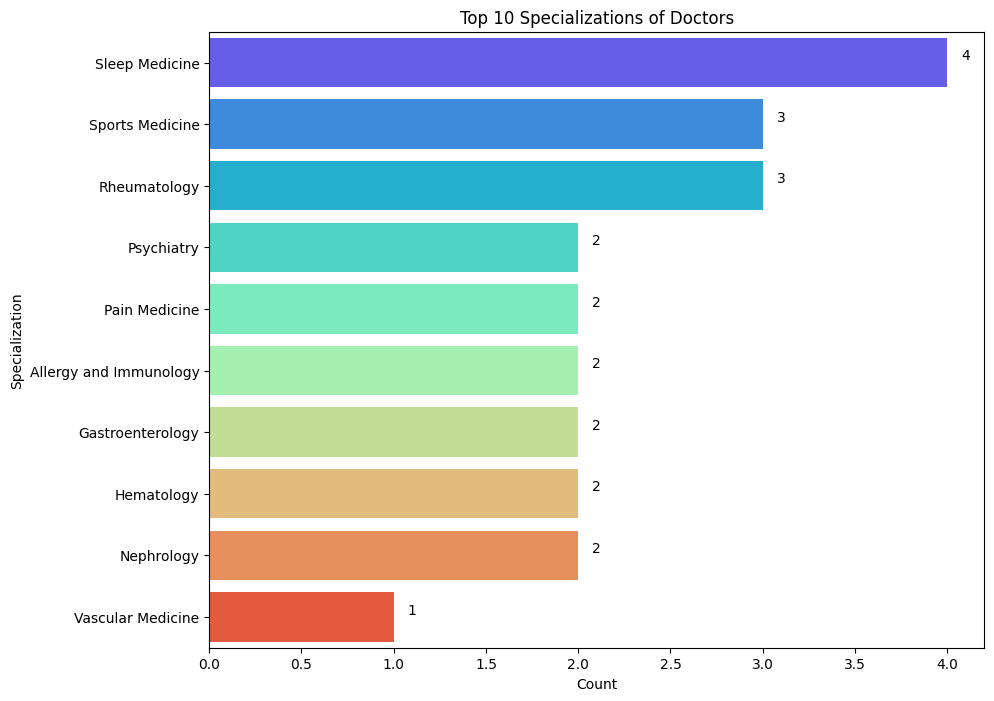

In [48]:
plt.figure(figsize=(10, 8))
top_10_specializations = Healthcare_data['specialization'].value_counts().nlargest(10)
sns.countplot(y='specialization', data=Healthcare_data, order=top_10_specializations.index, palette='rainbow')

for i, count in enumerate(top_10_specializations):
    plt.text(count + 0.1, i, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Top 10 Specializations of Doctors')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()

#Average Years of Experience by Specialization (Top 20)

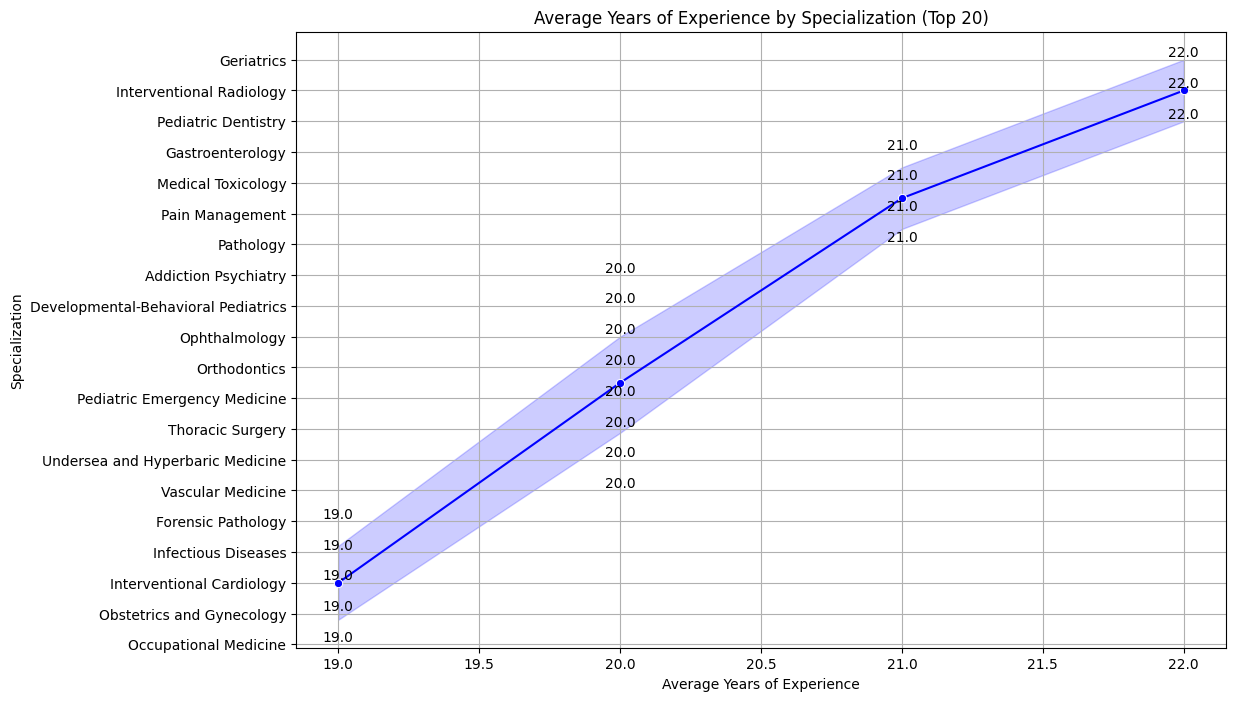

In [49]:
top_20_avg_years_experience = Healthcare_data.groupby('specialization')['years_of_experience'].mean().nlargest(20)

plt.figure(figsize=(12, 8))
sns.lineplot(x=top_20_avg_years_experience.values, y=top_20_avg_years_experience.index, marker='o', color='b')
plt.title('Average Years of Experience by Specialization (Top 20)')
plt.xlabel('Average Years of Experience')
plt.ylabel('Specialization')
plt.grid(True)

for x, y in zip(top_20_avg_years_experience.values, top_20_avg_years_experience.index):
    plt.text(x, y, f'{x:.1f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

#Word Cloud from Healthcare

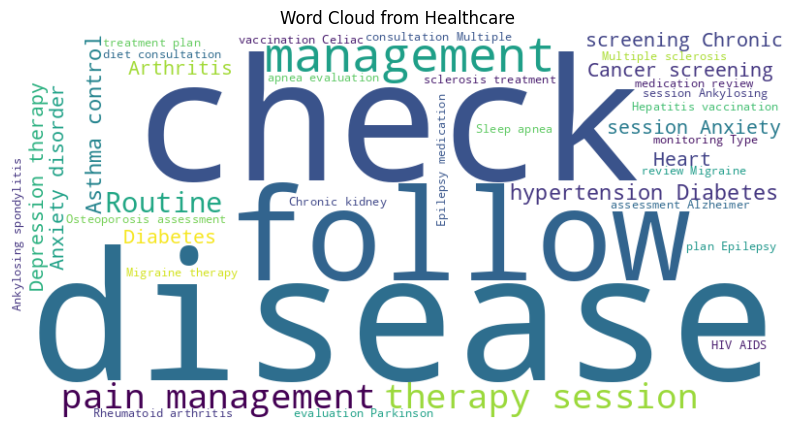

In [50]:
notes_text = ' '.join(Healthcare_data['notes'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(notes_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud from Healthcare')
plt.axis('off')
plt.show()


#Correlation Matrix

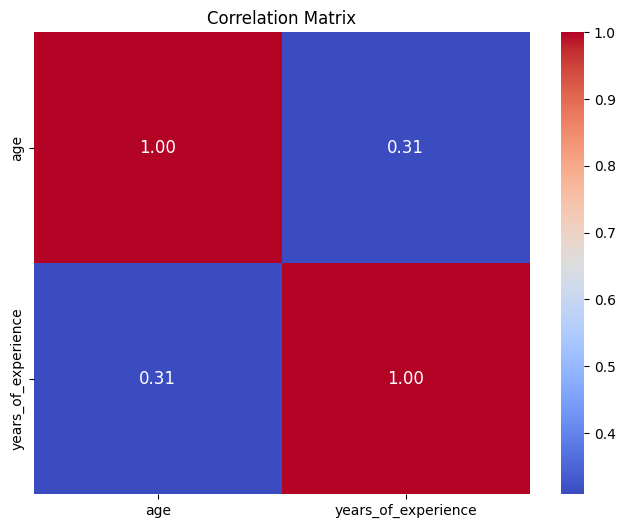

In [51]:
numerical_data = Healthcare_data[['age', 'years_of_experience']]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()


#Age vs. Doctor Experience

In [52]:
fig = px.scatter(Healthcare_data, x='age', y='years_of_experience', color='gender',
                 hover_data=['patient_name', 'specialization'],
                 title='Age vs. Doctor Experience')
fig.show()


#Appointments Over Time

In [53]:
appointments_per_date = Healthcare_data['appointment_date'].value_counts().sort_index().reset_index()
appointments_per_date.columns = ['Appointment_Date', 'Number_of_Appointments']

fig = px.line(appointments_per_date, x='Appointment_Date', y='Number_of_Appointments',
              title='Appointments Over Time')
fig.update_xaxes(title='Appointment Date')
fig.update_yaxes(title='Number of Appointments')
fig.show()


In [54]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

notes = Healthcare_data['notes'].tolist()
tokenized_notes = [word_tokenize(note) for note in notes]


In [55]:
nlp = spacy.load('en_core_web_sm')

notes = Healthcare_data['notes'].tolist()
processed_notes = [nlp(note) for note in notes]

for doc in processed_notes:
    for ent in doc.ents:
        print(ent.text, ent.label_)


Epilepsy PERSON
2 CARDINAL
Rheumatoid ORG
Epilepsy PERSON
2 CARDINAL
Rheumatoid ORG
Epilepsy PERSON
2 CARDINAL
Rheumatoid ORG
Epilepsy PERSON
2 CARDINAL
Rheumatoid ORG


In [56]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

text = Healthcare_data['notes'][0]
labels = [1]

inputs = tokenizer(text, return_tensors='pt')

outputs = model(**inputs, labels=torch.tensor(labels))
print(outputs.logits)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[-0.4429,  0.5306]], grad_fn=<AddmmBackward0>)


#Machine Learning Model of Gradient Boosting Classifier

In [57]:
features = ['age', 'gender', 'specialization', 'years_of_experience', 'test_result']
Healthcare_data['gender'] = pd.factorize(Healthcare_data['gender'])[0]

X = Healthcare_data[features]
y = Healthcare_data['gender']

categorical_features = ['specialization', 'test_result']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=None))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

pipeline.fit(X_train, y_train)

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Gradient Boosting Classifier: {accuracy:.2f}')

print('Classification Report of Gradient Boosting Classifier:')
print(classification_report(y_test, y_pred))


Accuracy of Gradient Boosting Classifier: 0.85
Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.83      0.91      0.87        11

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20



#Confusion Matrix of Gradient Boosting Classifier

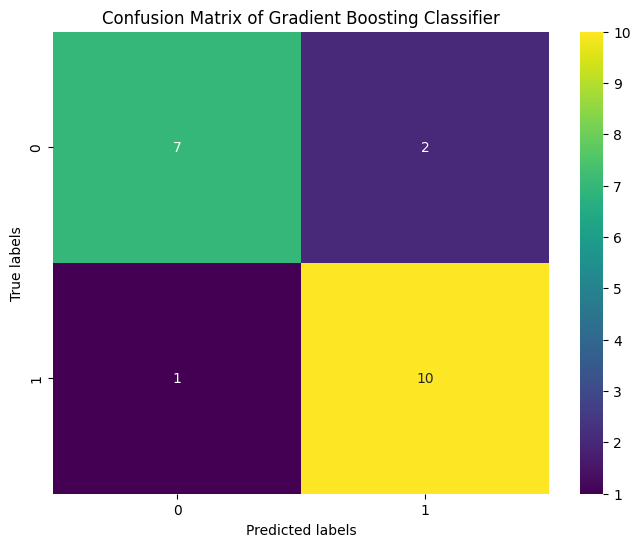

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()

#ROC Curve of Gradient Boosting Classifier

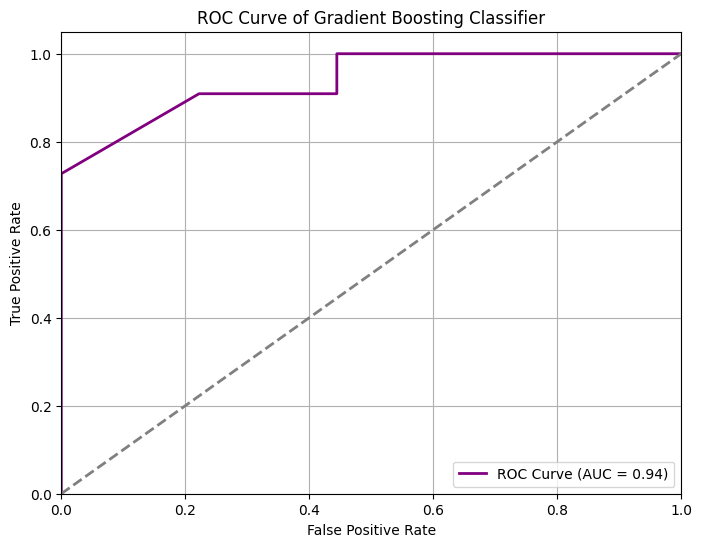

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#Machine Learning Model of Logistic Regression

In [60]:
features = ['age', 'gender', 'specialization', 'years_of_experience', 'test_result']

Healthcare_data['gender'] = pd.factorize(Healthcare_data['gender'])[0]

X = Healthcare_data[features]
y = Healthcare_data['gender']

categorical_features = ['specialization', 'test_result']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

pipeline.fit(X_train, y_train)

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy:.2f}')

print('Classification Report of Logistic Regression:')
print(classification_report(y_test, y_pred))


Accuracy of Logistic Regression: 0.85
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



#Confusion Matrix of Logistic Regression

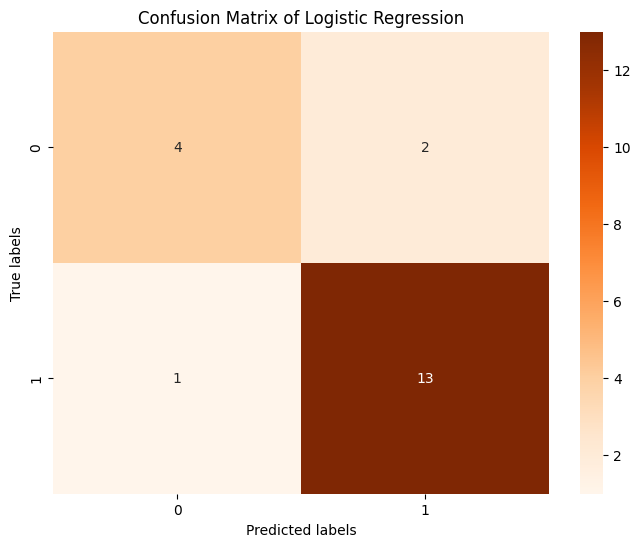

In [61]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='d', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

#ROC Curve of  Logistic Regression

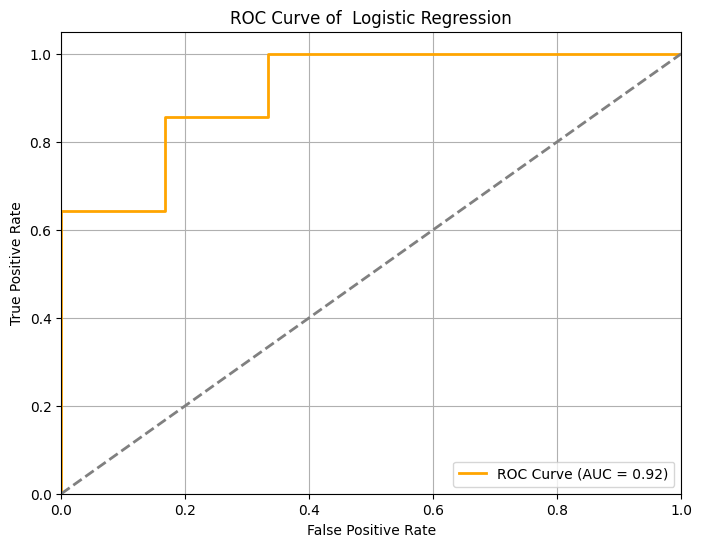

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of  Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Machine Learning Model of Random Forest Classifier

In [63]:
features = ['age', 'gender', 'specialization', 'years_of_experience', 'test_result']

Healthcare_data['gender'] = pd.factorize(Healthcare_data['gender'])[0]

X = Healthcare_data[features]
y = Healthcare_data['gender']

categorical_features = ['specialization', 'test_result']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=None))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

pipeline.fit(X_train, y_train)

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')

print('Classification Report of Random Forest Classifier:')
print(classification_report(y_test, y_pred))


Accuracy of Random Forest Classifier: 0.70
Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.67      0.67      0.67         9

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



#Confusion Matrix of Random Forest Classifier

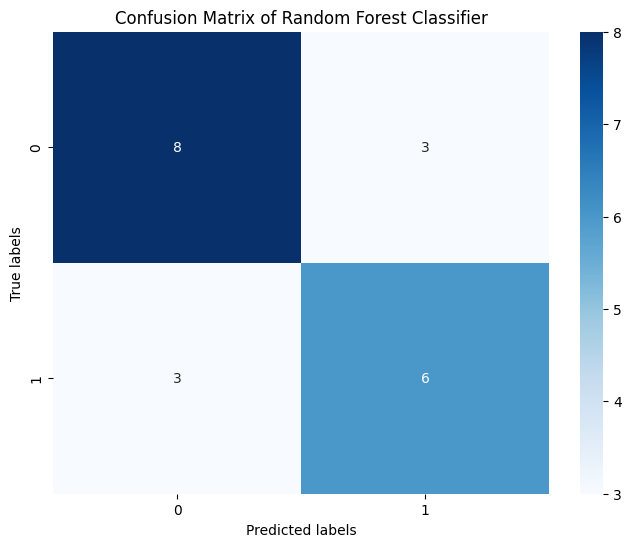

In [64]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

#ROC Curve of Random Forest Classifier

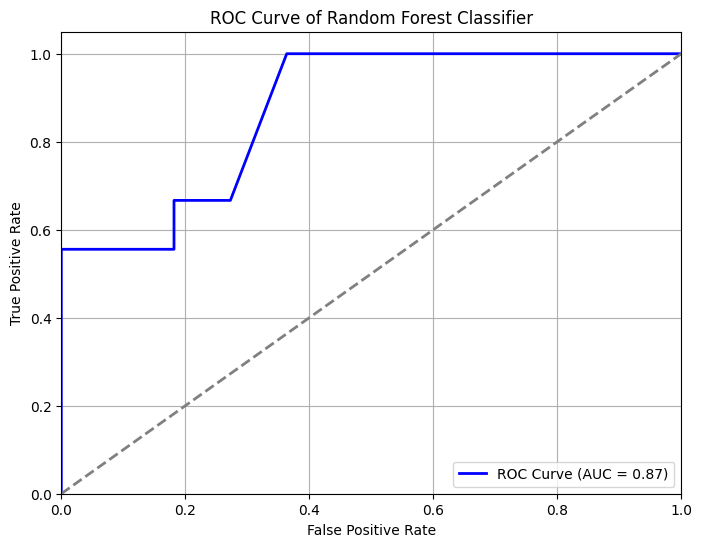

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Machine Learning Model of Neural Network

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
Healthcare_data = pd.read_csv('/content/Healthcare.csv')

# Encoding categorical variables
label_encoders = {}
for column in ['gender', 'specialization', 'test_result']:
    le = LabelEncoder()
    Healthcare_data[column] = le.fit_transform(Healthcare_data[column])
    label_encoders[column] = le

# Features and target
features = ['age', 'gender', 'specialization', 'years_of_experience', 'test_result']
X = Healthcare_data[features]
y = Healthcare_data['gender']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=8, batch_size=16, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Predictions
y_pred_proba = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Neural Network: {accuracy:.2f}')
print('Classification Report of Neural Network:')
print(classification_report(y_test, y_pred))

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4262 - loss: 0.8816 - val_accuracy: 0.3500 - val_loss: 0.7968
Epoch 2/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4387 - loss: 0.8231 - val_accuracy: 0.3500 - val_loss: 0.7765
Epoch 3/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3998 - loss: 0.8484 - val_accuracy: 0.4000 - val_loss: 0.7546
Epoch 4/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4774 - loss: 0.7926 - val_accuracy: 0.4500 - val_loss: 0.7337
Epoch 5/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5038 - loss: 0.7798 - val_accuracy: 0.5000 - val_loss: 0.7143
Epoch 6/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4552 - loss: 0.7705 - val_accuracy: 0.6000 - val_loss: 0.6985
Epoch 7/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5073 - loss: 0.7796 - val_accuracy: 0.6500 - val_loss: 0.6831
Epoch 8/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4257 - loss: 0.8090 - val_accuracy: 0.6500 - val_loss: 0.6681
1/1 ━━━━━━━━━━━━━━━━━

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Confusion Matrix of Neural Network

Confusion Matrix of Neural Network:
[[ 3  5]
 [ 2 10]]


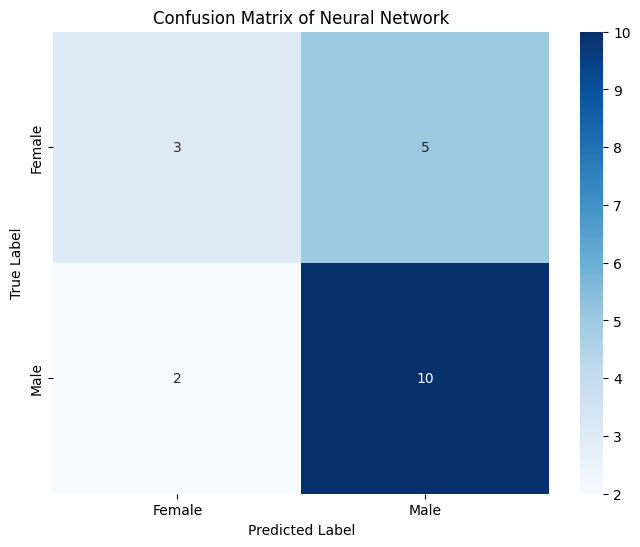

In [68]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of Neural Network:')
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Neural Network')
plt.show()

#ROC Curve of Neural Network

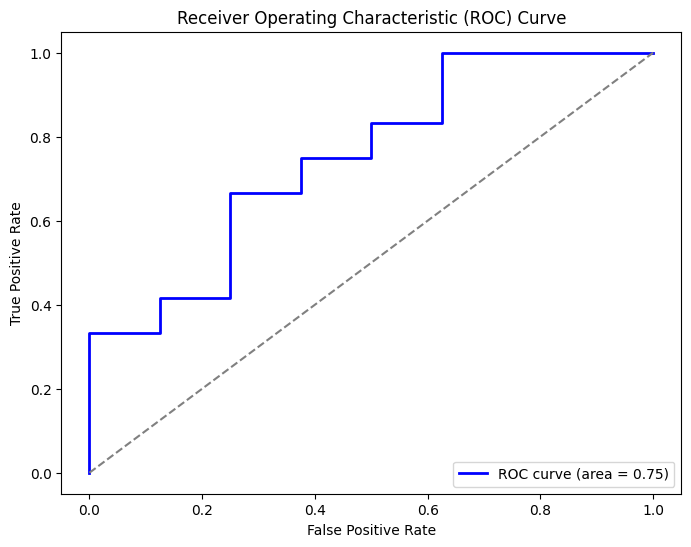

In [69]:
from sklearn.metrics import roc_curve, auc
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#ARIMA Model

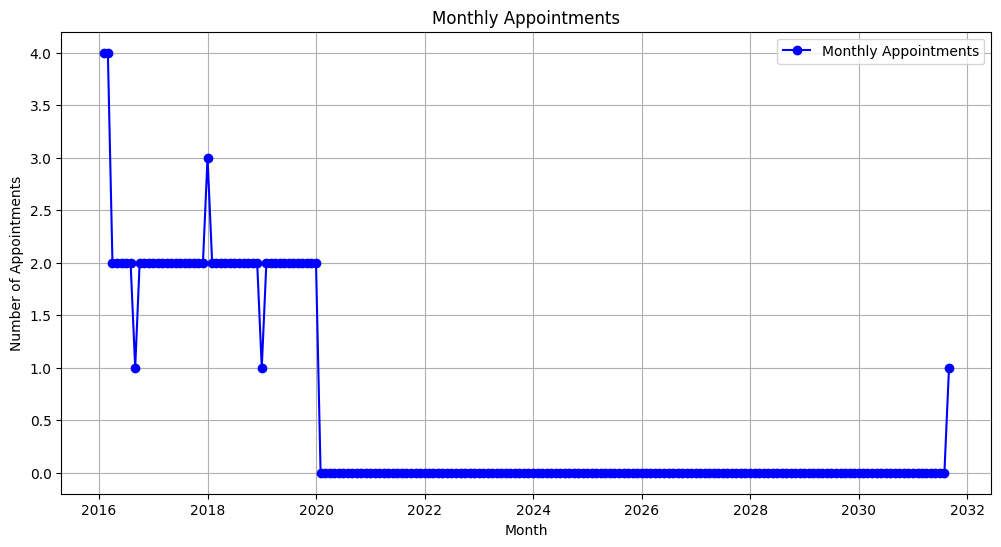

Forecasted Appointments:
2031-03-31    2.174710e-75
2031-04-30    2.279137e-75
2031-05-31    2.284151e-75
2031-06-30    2.284392e-75
2031-07-31    2.284404e-75
2031-08-31    2.284404e-75
Freq: M, Name: predicted_mean, dtype: float64
RMSE: 0.408248290463863


In [70]:
Healthcare_data['appointment_date'] = pd.to_datetime(Healthcare_data['appointment_date'])

monthly_appointments = Healthcare_data.resample('M', on='appointment_date').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_appointments, marker='o', linestyle='-', color='b', label='Monthly Appointments')
plt.title('Monthly Appointments')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True)
plt.legend()
plt.show()

train_data = monthly_appointments.iloc[:-6]
test_data = monthly_appointments.iloc[-6:]

model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test_data))

print("Forecasted Appointments:")
print(forecast)

rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"RMSE: {rmse}")
